**Table of contents**    
- Importing libraries    
- Reading and exploring the data    
- Preparing the data for logistic regression    
- Modelling    
  - Logistic regression model    
  - Fixing the model    
  - Classification report for the train set    
  - ROC curve for the train set    
  - Classification report for the test set    
  - ROC curve for the test set    
- Random Forest    
  - Classification report for the train set (random forest model)    
  - Classification report for the test set (random forest model)    
  - Importance Plot    
- Logistic regression and random forest comparison    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Predicting whether or not a customer was satisfied with the flight

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Reading and exploring the data

In [2]:
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df.shape

(129880, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

#### Most likely the NaN's were supposed to be 0

In [5]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

## Preparing the data for logistic regression

In [6]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [7]:
df['satisfaction'] = np.where(df['satisfaction'] == 'satisfied',1,0)

In [8]:
df_with_dummies = pd.get_dummies(data = df, columns= ['Gender','Customer Type','Type of Travel',
'Class','Seat comfort','Departure/Arrival time convenient',
'Food and drink','Gate location','Inflight wifi service',
'Inflight entertainment','Online support','Ease of Online booking',
'On-board service','Leg room service','Baggage handling',
'Checkin service','Cleanliness','Online boarding'],drop_first =True)

In [9]:
df_with_dummies

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,1,65,265,0,0.0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,47,2464,310,305.0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,15,2138,0,0.0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,1,60,623,0,0.0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,70,354,0,0.0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1731,0,0.0,0,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0
129876,0,63,2087,174,172.0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
129877,0,69,2320,155,163.0,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
129878,0,66,2450,193,205.0,1,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0


## Modelling

### Logistic regression model

In [10]:
x = df_with_dummies.drop('satisfaction',axis=1)
y = df['satisfaction']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=123)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (90916, 78)
x_test: (38964, 78)
y_train: (90916,)
y_test: (38964,)


In [11]:
mod = sm.Logit(y_train,x_train).fit()
print(mod.summary())

         Current function value: 0.233202
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                90916
Model:                          Logit   Df Residuals:                    90841
Method:                           MLE   Df Model:                           74
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.6614
Time:                        16:44:15   Log-Likelihood:                -21202.
converged:                      False   LL-Null:                       -62618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                    -0.0037      0.001     -4.056      0.000      -0.005   

c:\Users\piotr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### This model has a lot of invalid variables which ought to be excluded

### Fixing the model

In [12]:
x = df_with_dummies.drop(['satisfaction','Seat comfort_1','Seat comfort_2',
'Seat comfort_3','Seat comfort_4','Seat comfort_5',
'Gate location_1','Gate location_2','Gate location_3',
'Gate location_4','Gate location_5','Online support_1',
'Online support_2','Online support_3','Online support_4',
'Online support_5','Ease of Online booking_1','Ease of Online booking_2',
'Ease of Online booking_3','Ease of Online booking_4','Ease of Online booking_5',
'On-board service_1','On-board service_2','On-board service_3',
'On-board service_4','On-board service_5','Checkin service_1',
'Checkin service_2','Checkin service_3','Checkin service_4',
'Checkin service_5','Cleanliness_1','Cleanliness_2',
'Cleanliness_3','Cleanliness_4','Cleanliness_5',
'Online boarding_1','Online boarding_2','Online boarding_3',
'Online boarding_4','Online boarding_5'],
axis=1)
y = df['satisfaction']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=123)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (90916, 38)
x_test: (38964, 38)
y_train: (90916,)
y_test: (38964,)


In [13]:
mod = sm.Logit(y_train,x_train).fit()
print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.322779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                90916
Model:                          Logit   Df Residuals:                    90878
Method:                           MLE   Df Model:                           37
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.5314
Time:                        16:44:17   Log-Likelihood:                -29346.
converged:                       True   LL-Null:                       -62618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                    -0.0047      0.001 

In [14]:
def group_round(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [15]:
y_train_pred = mod.predict(x_train).apply(group_round)

### Classification report for the train set

In [16]:
print(classification_report(y_pred = y_train_pred, y_true = y_train))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     41195
           1       0.87      0.87      0.87     49721

    accuracy                           0.86     90916
   macro avg       0.86      0.86      0.86     90916
weighted avg       0.86      0.86      0.86     90916



### ROC curve for the train set

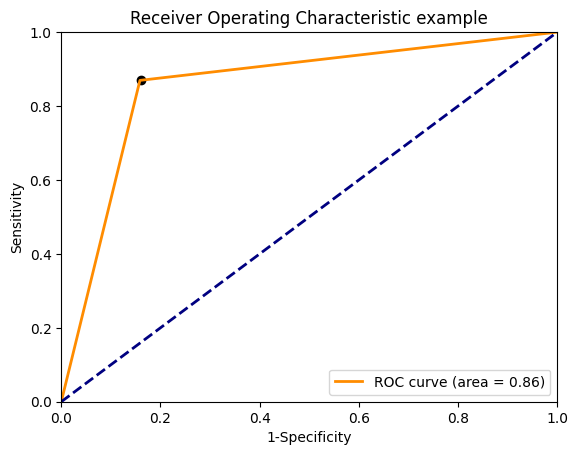

In [17]:
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter([0.16], [0.87], color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
round(df_with_dummies['satisfaction'].value_counts()[1]/df_with_dummies['satisfaction'].value_counts().sum(),2)

0.55

In [19]:
y_test_pred = mod.predict(x_test).apply(group_round)

### Classification report for the test set

In [20]:
print(classification_report(y_pred=y_test_pred,y_true = y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     17598
           1       0.87      0.88      0.87     21366

    accuracy                           0.86     38964
   macro avg       0.86      0.86      0.86     38964
weighted avg       0.86      0.86      0.86     38964



### ROC curve for the test set

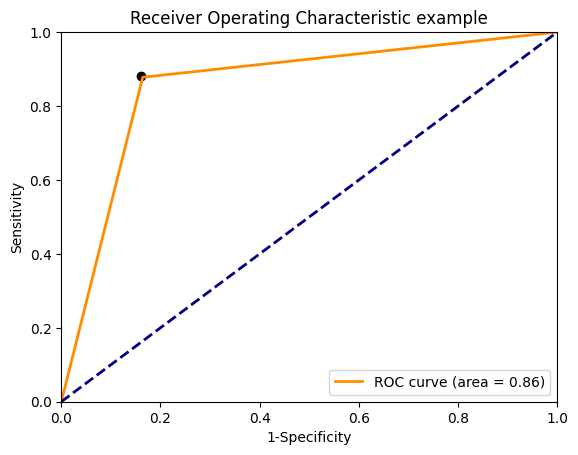

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter([0.16], [0.88], color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()

In [22]:
df.shape[1]**0.5

4.795831523312719

## Random Forest

In [23]:
rf = RandomForestClassifier(max_features=5,n_estimators=200,random_state=424,max_depth=6)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=5, n_estimators=200,
                       random_state=424)

In [24]:
y_train_rf_pred = rf.predict(x_train)

In [25]:
y_train_rf_pred

array([0, 0, 0, ..., 1, 1, 1])

### Classification report for the train set (random forest model)

In [26]:
print(classification_report(y_train,y_train_rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     41195
           1       0.86      0.89      0.87     49721

    accuracy                           0.86     90916
   macro avg       0.86      0.86      0.86     90916
weighted avg       0.86      0.86      0.86     90916



In [27]:
y_test_rf_pred = rf.predict(x_test)

In [28]:
y_test_rf_pred

array([1, 1, 1, ..., 0, 1, 1])

### Classification report for the test set (random forest model)

In [29]:
print(classification_report(y_test,y_test_rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     17598
           1       0.86      0.89      0.88     21366

    accuracy                           0.86     38964
   macro avg       0.86      0.86      0.86     38964
weighted avg       0.86      0.86      0.86     38964



In [30]:
importances = rf.feature_importances_

In [31]:
cols_list = x_train.columns.to_list()

In [32]:
importances_list = list(importances)

### Importance Plot

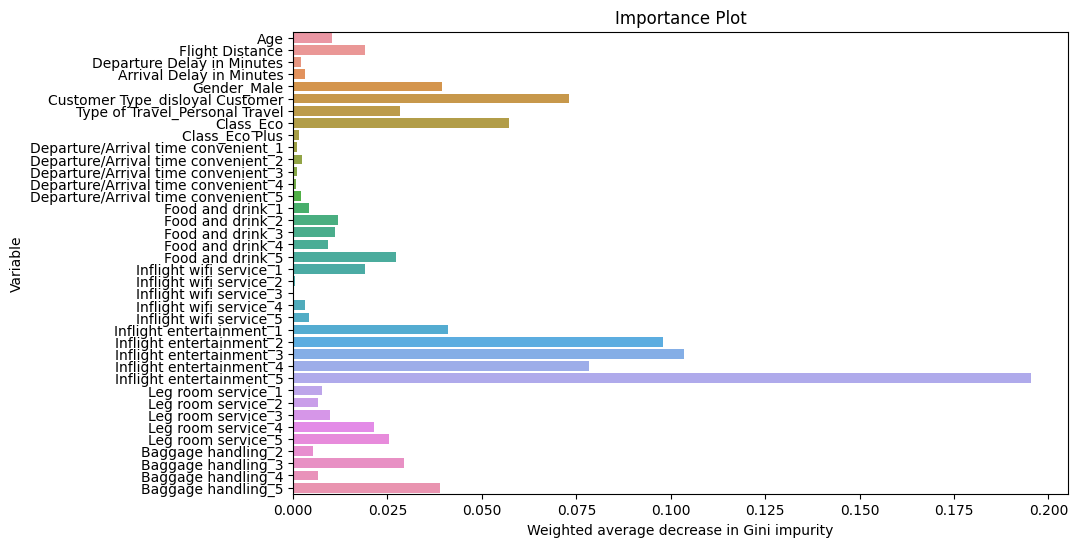

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(y=cols_list,x=importances_list)
plt.title('Importance Plot')
plt.ylabel('Variable')
plt.xlabel('Weighted average decrease in Gini impurity')
plt.show()

## Logistic regression and random forest comparison

In [34]:
model_metrics_test_set = pd.DataFrame({'model_type':['logistic_regression_test_set','random_forest_test_set'],
                              'accuracy_score':[0.86,0.86],
                              'recall: 0':[0.84,0.83],
                              'recall: 1':[0.88,0.89],
                              'precision 0':[0.85,0.86],
                              'precision 1':[0.87,0.86]})

In [35]:
model_metrics_test_set

,model_type,accuracy_score,recall: 0,recall: 1,precision 0,precision 1
0,logistic_regression_test_set,0.86,0.84,0.88,0.85,0.87
1,random_forest_test_set,0.86,0.83,0.89,0.86,0.86


#### All of the models are valid, since in the test set, No Information Rate would be equal to 0.55

In [36]:
round(y_train.value_counts()[1]/y_train.value_counts().sum(),2)

0.55